# Samenhang

In [81]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.cm as cm
import statistics

missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'MISSING', 'Unknown',
                  'Weet ik niet', 'None', 'ONBEKEND', '"ontbrekend"', '"onbekend"', 'onbekend']

In [82]:
def outlier_boundaries(x, factor=1.5):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    I = Q3 - Q1
    return [Q1 - factor * I, Q3 + factor * I]


def drop_outliers(df, row):
    df['Z-Score'] = np.abs((df[row] - df[row].mean()) / df[row].std())
    filtered_df = df[df['Z-Score'] <= 3]
    filtered_df = filtered_df.drop('Z-Score', axis=1)
    return filtered_df


def aantal_klassen(series):
    n = len(series)
    print("Sturges (# klassen): " + str(math.ceil(1 + math.log2(n))))  # Sturges
    b = 3.5 * statistics.stdev(series) / (n ** (1 / 3))
    print("Scott (klasse breedte): " + str(math.ceil((series.max() - series.min()) / b)))  # Scott
    print("Scott (# klassen): " + str(math.ceil(math.sqrt(n))))
    print("[√n]: " + str(math.ceil(math.sqrt(n))))


def kendall(x, y):
    x = x.rank()
    y = y.rank()
    n = len(x)
    aantal = 0

    for i in range(1, n - 1):
        for j in range(i + 1, n):
            aantal = aantal + np.sign(x[i] - x[j]) * np.sign(y[i] - y[j])

    return 2 * aantal / (n / (n - 1))

## Sociale media en studieresultaat
We willen nagaan of er een verband bestaat tussen het gebruik van sociale media en de prestaties van
studenten.
We vragen aan 1064 studenten hoeveel uren ze gemiddeld per dag met sociale media bezig zijn. Onder
sociale media verstaan we Facebook, YouTube, blogs, Twitter, MySpace en LinkedIn.
We gaan ook na wat de eindscore is van deze studenten op het einde van het jaar.
Het resultaat van deze enquête vind je in het bestand "socialeMediaVsPunten.csv".

1. Lees dit bestand in. Let erop dat het aantal uren als getallen wordt gelezen. Verwijder de rijen waar
een onbekende waarde staat. Verwijder nu de rijen met uitschieters. Hoeveel rijen schieten er over?

In [85]:
# Lees het CSV-bestand in een DataFrame
df = pd.read_csv("./data/socialeMediaVsPunten.csv", sep=",", decimal=".", header=0, na_values=missing_values)
df.dropna(inplace=True)

# Bepaal de uitschietergrenzen voor de kolom 'punten' & 'uren'
outliers_punten = outlier_boundaries(df["punten"])
outliers_uren = outlier_boundaries(df["uren"])

# # Filter de rijen met uitschieters
df = df[(df["punten"] >= outliers_punten[0]) & (df["punten"] <= outliers_punten[1])]
df = df[(df["uren"] >= outliers_uren[0]) & (df["uren"] <= outliers_uren[1])]

# df = drop_outliers(df, "uren")
# df = drop_outliers(df, "punten")
# df = drop_outliers(df, "uren")
# df = drop_outliers(df, "punten")

# Print het aantal overgebleven rijen
print(len(df))
df

1056


,uren,punten
0,0.70,15
1,0.68,18
2,1.50,14
3,2.40,6
4,0.00,18
...,...,...
1059,2.64,15
1060,1.58,11
1061,1.53,18
1062,0.80,16


2. Maak een histogram van de uren en de punten apart. Gebruik de formule van Sturges om het aantal
klassen te bepalen

Sturges (# klassen): 12
Scott (klasse breedte): 14
Scott (# klassen): 33
[√n]: 33
None


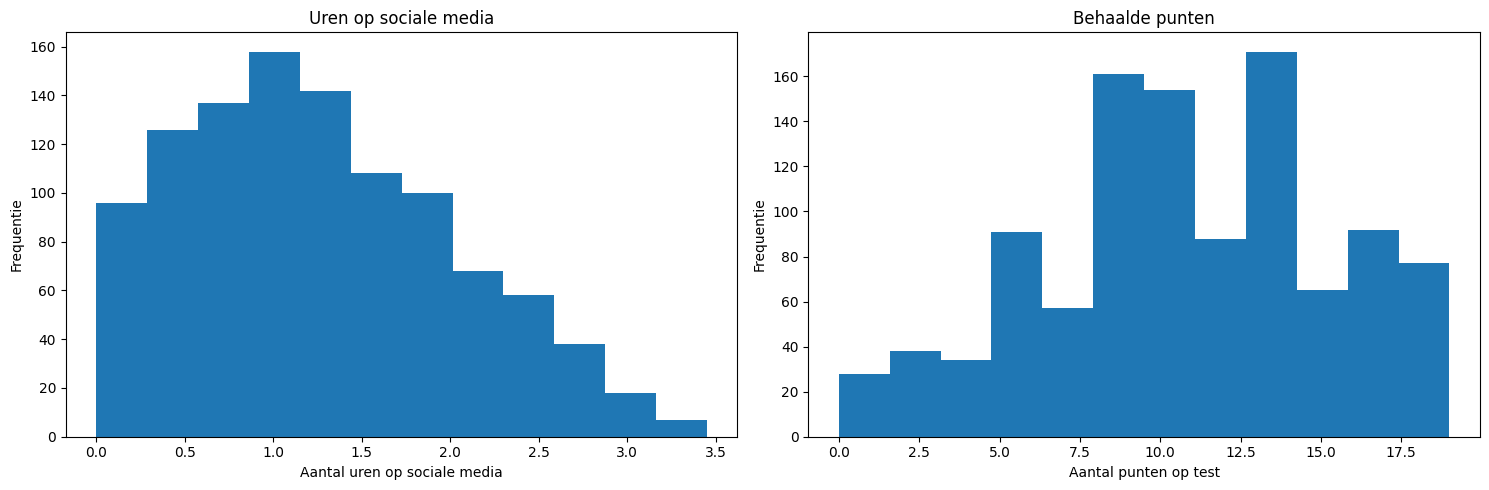

In [45]:
# Bepaal het aantal klassen
print(aantal_klassen(df.uren))
klassen = 12

# Maak subplots voor 'uren' en 'punten'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram voor 'uren'
df['uren'].plot.hist(ax=axes[0], bins=12)
axes[0].set_xlabel("Aantal uren op sociale media")
axes[0].set_ylabel("Frequentie")
axes[0].set_title("Uren op sociale media")

# Histogram voor 'punten'
df['punten'].plot.hist(ax=axes[1], bins=12)
axes[1].set_xlabel("Aantal punten op test")
axes[1].set_ylabel("Frequentie")
axes[1].set_title("Behaalde punten")

plt.tight_layout()
plt.show()

3. Wat is het gemiddeld aantal uren dat een student aan sociale media spendeert?

In [51]:
print(f"Gemiddeld aantal uren: {df.uren.mean().round(2)} uur.")

Gemiddeld aantal uren: 1.26 uur.


4. Wat is de standaardafwijking van het aantal uren? Wat betekent dit?

In [54]:
print(
    f"Standaardafwijking aantal uren: {df.uren.std().round(2)}.\nDit wil zeggen dat de data veel varieert tegenover het gemiddelde.")

Standaardafwijking aantal uren: 0.76.
Dit wil zeggen dat de data veel varieert tegenover het gemiddelde.


5. Wat is de gemiddelde score van de studenten?

In [55]:
print(f"Gemiddelde score studenten: {df.punten.mean().round(2)} punten.")

Gemiddelde score studenten: 10.81 punten.


6. Wat is de standaardafwijking van de score?

In [60]:
print(f"Standaardafwijking punten: {df.punten.std().round(2)}")

Standaardafwijking punten: 4.5


### Hulp standaardafwijking:
De standaardafwijking is een maat voor de spreiding of variabiliteit van de dataset. Het meet de gemiddelde afstand van elk datapunt tot het gemiddelde. Een lage standaardafwijking geeft aan dat de waarden in de dataset dicht bij het gemiddelde liggen en dat de gegevens minder variabel zijn. Een hoge standaardafwijking geeft daarentegen aan dat de waarden in de dataset verder van het gemiddelde liggen en dat de gegevens meer variabel zijn.

7. Maak een scatterplot van de 2 variabelen. Welke correlatie verwacht je?

We verwachten een lage correlatie.


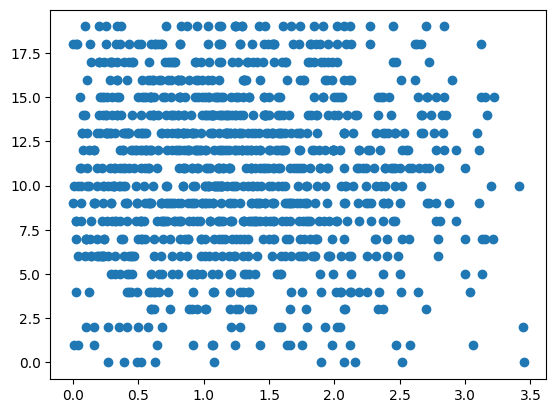

In [63]:
fig, ax = plt.subplots()
ax.scatter(df.uren, df.punten)

print("We verwachten een lage correlatie.")

8. Bereken de correlatie tussen de 2 variabelen. Doe dit ook eens via de Z-scores (Pearson). Wat
besluit je?

In [65]:
print(
    f"Correlatie tussen uren en punten: {df.uren.corr(df.punten)}\nDit wil zeggen dat er geen lineair verband is aangetoond tussen de twee variabelen.")

Correlatie tussen uren en punten: -0.014669282578565843
Dit wil zeggen dat er geen lineair verband is aangetoond tussen de twee variabelen.


9. Welke rangcorrelatie vind je volgens Kendall? Wat betekent deze waarde?

In [71]:
print(
    f"Rangcorrelatie tussen uren en punten: {df.uren.corr(df.punten, method='kendall')}\nOok deze coëfficiënt geeft aan dat er geen verband is.")

Rangcorrelatie tussen uren en punten: -0.006172414993231387
Ook deze coëfficiënt geeft aan dat er geen verband is.


10. Heeft het zin om hier een regressielijn te bepalen? Waarom wel/niet? Bepaal de regressielijn als dit
zin heeft.

Nee, want er is geen correlatie. Een regressielijn zou maar 0.02152% (R²) van de variantie
verklaren.